# 

            '''                        CS 637
                                     Homework - 1
                                  KUSHAL SHANKAR RAJ




Design and Implementation:

Program design consists of a Neural_Network class which contains methods like weight_initialization, 
forward_pass, backward_pass, update_weights. 

Program designed for datasets like MNIST and Madison_Irrigated and rain dataset.

The model is the first function which is called for training the neural network. 
Depending on the length of the layer dimension list the weight and bias are initialized
and put into a parameters dictionary. 

Then, the forward_pass takes these parameters and executes and gives the output.
This output is used to calculate the loss then backpropagate the error through the network. 

User is given option to choose Relu or Sigmoid as activation function. 
Softmax at the output layer for classification and cross entropy as loss function.

The program is generalized in a way that the number of parameters of the neural network 
can be customised according the user’s flexibility. 

Various parameters are:

	User_Input: The neural network accepts an input with any dimension. 
                The input can be multiclass, change in number of classes will not matter. 
                The neural network classifies any number of classes.

	Hidden_layers:  The number of hidden layers are declared dynamically in the neural network
                    at the time of training the neural network. Any number of hidden layers can be added.
                    
	Activation_function: Depending on the activation function specified in the function call,
                         various activation functions such as sigmoid or relu can be selected.
                         
	Learning rate and epochs: The learning rate and the number of iterations for training of the
                               test data can be passed as an argument'''


In [1]:

# 01. MNIST DATA SET 
#--------------------------------------------------------


#DATA PREPROCESSING
#--------------------

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import mnist
%matplotlib inline
import math
import sklearn.preprocessing as norm
from keras.datasets import mnist
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

#load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Reshapping and Normalizing given input data
input_data = np.asarray(x_train)
training_data = input_data.reshape(60000,784)
training_data = training_data.T
training_Completedata = norm.normalize(training_data)

y_train = np_utils.to_categorical(y_train)
training_Completelabels = np.asarray(y_train).T


testing_data = np.asarray(x_test)
testing_data = testing_data.reshape(10000,784)
testing_data = testing_data.T
testing_Completedata = norm.normalize(testing_data)

y_test = np_utils.to_categorical(y_test)
testing_Completelabels = np.asarray(y_test).T

print(training_Completedata.shape,training_Completelabels.shape,testing_Completedata.shape,testing_Completelabels.shape)

ModuleNotFoundError: No module named 'mnist'

In [3]:

# 02. Madison_IrrigatedRain DATA SET 
#--------------------------------------------------------

#DATA PREPROCESSING
#--------------------

file = r'Madison_Irrigated.xls'
df1 = pd.read_excel(file)

file = r'Madison_Rainfed.xls'
df2 = pd.read_excel(file)

frames = pd.concat([df1, df2])
training_data = frames.fillna(0)
training_data = training_data.to_numpy()
#print(type(training_data))

zero1 = np.zeros(1288)
one1 = np.ones(1288)
label_Irrigated = np.array([zero1,one1])

zero2 = np.zeros(5053)
one2 = np.ones(5053)
label_Rain = np.array([one2,zero2])

train_labels = np.append(label_Irrigated,label_Rain,axis = 1).T

training_data = np.take(training_data,np.random.permutation(training_data.shape[0]),axis=0,out=training_data)
train_labels = np.take(train_labels,np.random.permutation(train_labels.shape[0]),axis=0,out=train_labels)
training = norm.normalize(training_data)

#Train and test split 
X_train, X_test, y_train, y_test = train_test_split(training, train_labels, test_size=0.30, random_state=0)

X_training = X_train.T
X_testing = X_test.T
y_training = y_train.T
y_testing = y_test.T

print(X_training.shape,y_training.shape,X_testing.shape,y_testing.shape)

"\nfile = r'Madison_Irrigated.xls'\ndf1 = pd.read_excel(file)\n\nfile = r'Madison_Rainfed.xls'\ndf2 = pd.read_excel(file)\n\nframes = pd.concat([df1, df2])\ntraining_data = frames.fillna(0)\ntraining_data = training_data.to_numpy()\n#print(type(training_data))\n\nzero1 = np.zeros(1288)\none1 = np.ones(1288)\nlabel_Irrigated = np.array([zero1,one1])\n\nzero2 = np.zeros(5053)\none2 = np.ones(5053)\nlabel_Rain = np.array([one2,zero2])\n\ntrain_labels = np.append(label_Irrigated,label_Rain,axis = 1).T\n\ntraining_data = np.take(training_data,np.random.permutation(training_data.shape[0]),axis=0,out=training_data)\ntrain_labels = np.take(train_labels,np.random.permutation(train_labels.shape[0]),axis=0,out=train_labels)\ntraining = norm.normalize(training_data)\n\n#Train and test split \nX_train, X_test, y_train, y_test = train_test_split(training, train_labels, test_size=0.30, random_state=0)\n\nX_training = X_train.T\nX_testing = X_test.T\ny_training = y_train.T\ny_testing = y_test.T\n\npri

In [4]:
class Neural_network:
    def __init__(self):
        pass
    
    #Size are 784, 32 & 10
    def model(self,training_data,train_labels,testing_data,testing_labels,learning_rate,hidden_size, batch_size,activation,num_iterations):
        
         #__MODEL__WEIGHTS
        global layer1_weights
        global layer1_biases
        global layer2_weights
        global layer2_biases
        list_name = []
        
        #set input sizes
        training_data = training_data
        hidden_size = hidden_size
        learning_rate = learning_rate
        batch_size = batch_size
        num_iterations = num_iterations
        activation = activation
        train_labels = train_labels
        
        iter_cal = (((int(len(training_data[0])/batch_size))+1) - ((len(training_data[0]))/batch_size))
        count = int(iter_cal * batch_size)
        
        #Set Iterator
        train_1 = training_data
        
        if(count!=0):
            train_1 = np.append(training_data,training_data[:,0:count],axis = 1)
        
        test_1 = train_labels
        
        if(count!=0):
            test_1 = np.append(train_labels,train_labels[:,0:count],axis = 1)
        
        #encoding training labels 
        encoding_labels = self.accuracy_cal(test_1)
        
        #Initial parameters initialisations for given batch size
        initial_training = train_1[:,0:batch_size]
        
        #class labels
        class_labels = len(test_1)
       
        #Set parameters
        parameters = self.initialize_parameters(hidden_size,initial_training,class_labels, batch_size)
        
        iter = int(len(train_1[0])/batch_size) 
        
        #to store final predictons and accuracy after training
        final_output = []
        accuracy_results = []
        
        for p in range(num_iterations):
            
            k=0  
            j=batch_size
            
             #Array to append loss
            J = []
            list_name.clear()
            
            for q in range(iter):
                
                train_data = train_1[:,k:j]

                train_ytrain = test_1[:,k:j]


                #forward propagation
                output,activation1,Output_layer2 = self.forward_propagation(train_data,parameters,activation)

                #softmax encoding for accuracy
                col = output.shape[1]        
                row = output.shape[0]  
                
                for i in range(col):
                    arr = np.argmax(output[:row,i])
                    list_name.append(arr)    
                labels = np.asarray(list_name)
                
                #calculate the loss
                loss = self.cal_loss(train_ytrain,output)
                
                #Back propagation
                gradient_w1,gradient_b1,gradient_w2,gradient_b2 = self.backward_propagation(Output_layer2,train_data,train_ytrain,activation1,parameters,activation)

                #update the parameters
                parameters = self.update_parameters(learning_rate,gradient_w1,gradient_b1,gradient_w2,gradient_b2,parameters)

                #append loss
                J.append(loss)
                
                #Increment for next batch (Batch_size)
                k += batch_size
                j += batch_size
                
                #print(q,"...",iter)
                #Print accuracy after every epoch
                if(q==(iter-1)):
                    cal = np.sum(labels==encoding_labels)
                    evaluation = ((cal/len(training_data[0])) *100)
                    print("Iteration  :",p+1," (Epoch)   Accuracy = ",evaluation," %")
                    accuracy_results.append(evaluation)
            
            #Append FINAL COST and FINAL OUTPUT
            final = np.sum(J) 
            final_output.append(final)  
        
        #print(testing_data.shape,testing_labels.shape)
        fina_acc = evaluation
        self.test_inputdata(testing_data,testing_labels,parameters,batch_size,activation,fina_acc)
        #PLOT LOSS AND ACCURACY VS NO: OF INTERATIONS
        print("-----------------------------------------------------\n\nCost_Plot")
        self.plot_loss(final_output)
        print("-----------------------------------------------------\n\nAccuracy")
        self.plot_accu(accuracy_results)
        
        
        
#----------------------------------------------------------------------------------------------------------------------
#_________________FUNCTIONs________________
        
    
    #Testing input and labels Implementation
    def test_inputdata(self,testing_data,testing_labels,parameters,batch_size,activation,fina_acc):
        k=0  
        j=batch_size
        
        list_one = []
        list_two = []
        
         #Set Iterator
        iter = int(len(testing_data[0])/batch_size)
        
        count = iter * batch_size
        
        test = testing_data[:,0:count]
        testing_data = test
        
        label = testing_labels[:,0:count]
        testing_labels = label
        
        encoding_labels = self.accuracy_cal(testing_labels)
            
        for q in range(iter):
                
            #print("k and j: ", k,"  ",j)
            test_data = testing_data[:,k:j]
                
            #print("train:  ",training_data.shape)
            test_ytest = testing_labels[:,k:j]
                
            #print("train_labels:  ",train_labels.shape)

            #forward propagation
            output,activation1,Output_layer2 = self.forward_propagation(test_data,parameters,activation)
                
            #softmax encoding for accuracy
            col = output.shape[1]        
            row = output.shape[0]
                
            for i in range(col):
                arr = np.argmax(output[:row,i])
                list_two.append(arr)    
            labels = np.asarray(list_two)
                
            #Increment for next batch (Batch_size)
            k += batch_size
            j += batch_size
                
        #Print accuracy after every epoch
        cal = np.sum(labels==encoding_labels)
        print("-----------------------------------------------------\n\nTest Accuracy = ",((cal/(len(testing_data[0]))) *100)," %")
    
    
    #Labels Encoding
    def accuracy_cal(self,Complete_labels):
        length = Complete_labels.shape[1]
        row = Complete_labels.shape[0]
        
        index = []
        for i in range(length):
            for j in range(row):
                ones = Complete_labels[j,i]
                if(ones == 1):
                    index.append(j)

        labels_encoding = np.asarray(index)
        
        return labels_encoding
    
    
    #Relu activation
    def rectified(self,Z):
        return np.maximum(0,Z)
    
    
    #Relu or Sigmoid derivative optional
    def deriv_activation(self,var, Z):
        if (var == "relu"):
            z = 1 * (Z > 0)
        else:
            z = Z * (1 - Z)
        return z
    
    
    #Sigmoid
    def sigmoid(self,Z):
        z = 1/(1 + np.exp(-Z))
        return z
    
    
    #softmax function for output
    def softmax(self,x):
        exponentials = np.exp(x)
        sum_exponentials = np.sum(exponentials)
        result = exponentials/sum_exponentials
        return result
    
    
    
    #Initialize parameters
    def initialize_parameters(self,hidden_units,training_data, output_units,batch_size):
        
        mean = 0        #mean of parameters 
        std = 1         #standard deviation
            
        input_units = len(training_data)

        layer1_weights = np.random.normal(mean,std,(hidden_units,input_units))           #100,784     
        layer1_biases = np.random.rand(hidden_units,batch_size)                          #100,32           
        layer2_weights = np.random.normal(mean,std,(output_units,hidden_units))          #10,100
        layer2_biases = np.random.rand(output_units,batch_size)                          #10,32
        
        #dictionary to hold key and value pairs
        parameters = dict()
        parameters['layer1_weights'] = layer1_weights
        parameters['layer1_biases'] = layer1_biases
        parameters['layer2_weights'] = layer2_weights
        parameters['layer2_biases'] = layer2_biases
     
        return parameters
    
    
    
    #Forward Propagation
    def forward_propagation(self,training_data,parameters,activation):
        
        value = dict()            #to store the intermediate values for backward propagation
        m = len(training_data)    #number of training examples

        #get the parameters
        layer1_weights = parameters['layer1_weights']
        layer1_biases = parameters['layer1_biases']
        layer2_weights = parameters['layer2_weights']
        layer2_biases = parameters['layer2_biases']
    
        #forward prop
        Output_layer1 = np.matmul(layer1_weights,training_data) + layer1_biases
            
        if(activation == "relu"):
            activation1 = self.rectified(Output_layer1)
        elif(activation == "sigmoid"):
            activation1 = self.sigmoid(Output_layer1)
        else:
            print("Select a activation function....Type in relu or sigmoid: \n Re-run")
          
        Output_layer2 = np.matmul(layer2_weights,activation1) + layer2_biases
        
        #fill in the cache
        value['output'] = self.softmax(Output_layer2)
        value['activation1'] = activation1
      
        return value['output'],value['activation1'],Output_layer2
    
    
    
    #Back propagation
    def backward_propagation(self,output,train_dataset,train_labels,activation1,parameters,activationfn):
        #BACKWARD PROPAGATION
            
        #get the parameters
        layer2_weights = parameters['layer2_weights']

        #Gradient with respect to Z layer2
        
        #Gradient_z2 = derivative wrt loss * derivative wrt softmax activation
        gradient_z2 = train_labels - output

        #Gradient with respect to W layer2 
        gradient_w2 = np.dot(gradient_z2,activation1.T)
            
        #gradient with respect to B layer2
        gradient_b2 = gradient_z2
            
        #derivative of a1 --- z1 derivative
        if(activationfn == "relu"):
            derivative_z1 = self.deriv_activation("relu",activation1)
        if(activationfn == "sigmoid"):
            derivative_z1 = self.deriv_activation("sigmoid",activation1)
    
        #Gradient with respect to Z layer1
        gradient_z1 = derivative_z1 * (np.dot(layer2_weights.T,gradient_z2))

        #Gradient with respect to W layer1
        gradient_w1 = np.dot(gradient_z1,train_dataset.T)
            
        #gradient with respect to B layer1
        gradient_b1 = gradient_z1
        
        return gradient_w1,gradient_b1,gradient_w2,gradient_b2
    
    
    #Update parameters
    def update_parameters(self,learning_rate,gradient_w1,gradient_b1,gradient_w2,gradient_b2,parameters):
        
        #get the parameters
        layer1_weights = parameters['layer1_weights']
        layer1_biases = parameters['layer1_biases']
        layer2_weights = parameters['layer2_weights']
        layer2_biases = parameters['layer2_biases']
        
        #Update Weights1
        layer1_newweight = layer1_weights + ((learning_rate) * gradient_w1)
        
        #update bias1
        layer1_newbias = layer1_biases + ((learning_rate) * gradient_b1)

        #update Weights2
        layer2_newweight = layer2_weights + ((learning_rate) * gradient_w2)

        #update bias2
        layer2_newbias = layer2_biases + ((learning_rate) * gradient_b2)
            
        parameters['layer1_weights'] = layer1_newweight
        parameters['layer2_weights'] = layer2_newweight
        parameters['layer1_biases'] = layer1_newbias
        parameters['layer2_biases'] = layer2_newbias
    
        return parameters
    
    
    #calculate the loss 
    def cal_loss(self,train_labels,predictions):

        #cal loss cross entropy
        #-(y log y_hat) - (1-y) log (1-y_hat)
        y = train_labels
        y_hat = predictions
        
        #loss = np.sum(((-y) * (np.log(y_hat)))- ((1-y) * np.log(1-y_hat)))
        loss  = -np.sum((y) * (np.log(y_hat)))
        return loss
    
    
    #Plotting Loss and Accuracy
    def plot_loss(self,J_loss):
        #plot loss graph
        plt.plot(J_loss)
        plt.xlabel("No: of Iterations")
        plt.ylabel("Cost")
        plt.show()
        
        
    def plot_accu(self,Accuracy):
        #plot accuracy graph
        plt.plot(Accuracy)
        plt.xlabel("No: of Iterations")
        plt.ylabel("Accuracy")
        plt.show()

In [5]:
#01.  MNIST DATA SET
#--------------------------------------------------------
print("\n\nMNIST DATA SET PARAMETERS\n--------------------------\n")
NN = Neural_network()

print("Enter Learning Rate (Recommmended 0.001)   : ") 
Learning_rate = float(input()) 
print("Enter Hidden Units (Recommmended 100)      : ") 
Hidden_Units = int(input()) 
print("Enter Batch Size (Recommmended 32)         : ") 
Batch_Size = int(input()) 
print("Choose Activation Function-->>Type in relu or sigmoid : ") 
Activation_fn = str(input()) 
print("Enter Iterations (Recommmended 20)         : ") 
Iterations_epoch = int(input()) 

print("\n\n--------Report AND Graphs----------\n")
NN.model(training_Completedata,training_Completelabels,testing_Completedata,testing_Completelabels,Learning_rate,Hidden_Units,Batch_Size,Activation_fn,Iterations_epoch)




MNIST DATA SET PARAMETERS
--------------------------



--------Report AND Graphs----------



NameError: name 'training_Completedata' is not defined



Madison_IrrigatedRain DATA SET  PARAMETERS
------------------------------------------


Enter Learning Rate (Recommmended 0.001)   : 
0.0011
Enter Hidden Units (Recommmended 10)      : 
10
Enter Batch Size (Recommmended 32)         : 
32
Choose Activation Function-->>Type in relu or sigmoid : 
relu
Enter Iterations (Recommmended 15)         : 
15


--------Report AND Graphs----------

Iteration  : 1  (Epoch)   Accuracy =  64.84903109508787  %
Iteration  : 2  (Epoch)   Accuracy =  72.69040108156828  %
Iteration  : 3  (Epoch)   Accuracy =  76.34069400630915  %
Iteration  : 4  (Epoch)   Accuracy =  77.82785038305543  %
Iteration  : 5  (Epoch)   Accuracy =  78.68409193330329  %
Iteration  : 6  (Epoch)   Accuracy =  79.11221270842722  %
Iteration  : 7  (Epoch)   Accuracy =  79.3600721045516  %
Iteration  : 8  (Epoch)   Accuracy =  79.40513744930149  %
Iteration  : 9  (Epoch)   Accuracy =  79.40513744930149  %
Iteration  : 10  (Epoch)   Accuracy =  79.42767012167643  %
Iteration  : 11  (Ep

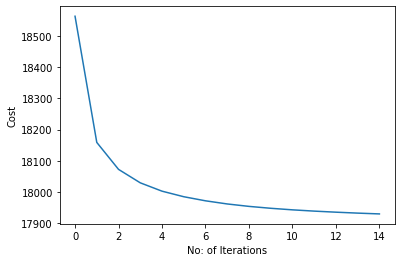

-----------------------------------------------------

Accuracy


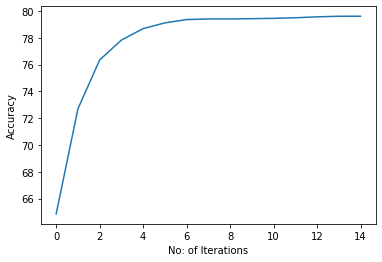

In [16]:

# 02. Madison_IrrigatedRain DATA SET 
#--------------------------------------------------------


print("\n\nMadison_IrrigatedRain DATA SET  PARAMETERS\n------------------------------------------\n\n")

NN = Neural_network()

print("Enter Learning Rate (Recommmended 0.001)   : ") 
Learning = float(input()) 
print("Enter Hidden Units (Recommmended 10)      : ") 
Hidden = int(input()) 
print("Enter Batch Size (Recommmended 32)         : ") 
BatchSize = int(input()) 
print("Choose Activation Function-->>Type in relu or sigmoid : ") 
Activfn = str(input()) 
print("Enter Iterations (Recommmended 15)         : ") 
Iterations = int(input()) 

print("\n\n--------Report AND Graphs----------\n")

NN.model(X_training,y_training,X_testing,y_testing,Learning,Hidden,BatchSize,Activfn,Iterations)